# LGM-VIP Data Science Internship Programme Intermediate Level Task 2: Prediction using Decision Tree Submitted by Pratiksha Shinde

Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('D:/Iris.1.csv')

In [14]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Randomising the dataset

In [15]:
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop(columns='Id')

In [16]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.4,1.4,0.3,Iris-setosa
1,6.0,2.2,4.0,1.0,Iris-versicolor
2,6.4,2.8,5.6,2.2,Iris-virginica
3,5.7,2.9,4.2,1.3,Iris-versicolor
4,5.9,3.0,4.2,1.5,Iris-versicolor


In [17]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [18]:
data.shape 

(150, 5)

In [19]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
print(data.groupby(["Species"]).size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Information of dataset

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Exploratory Data Analysis/Data Visualization/Pairplot

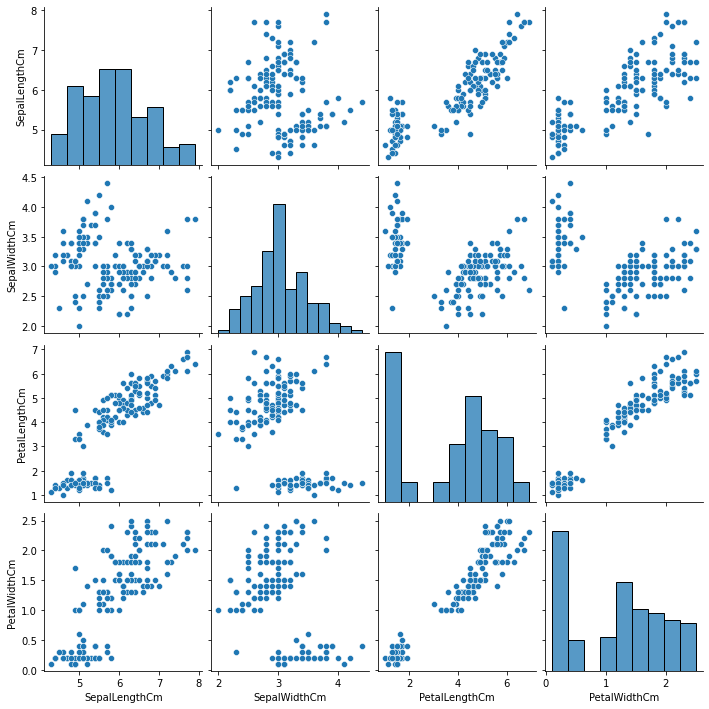

In [24]:
sns.pairplot(data)

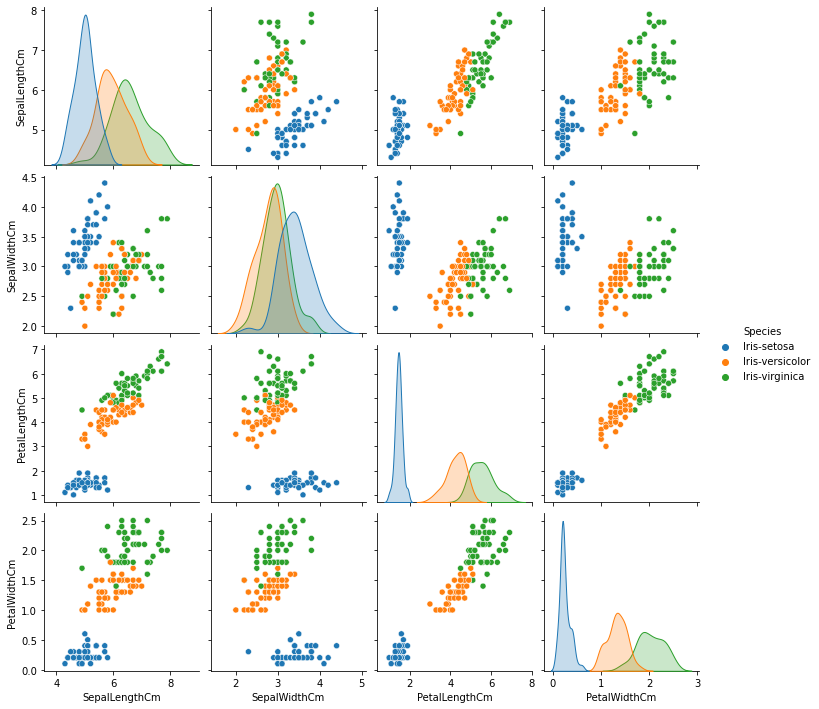

In [25]:
sns.pairplot(data, hue='Species')

Boxplots of features

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

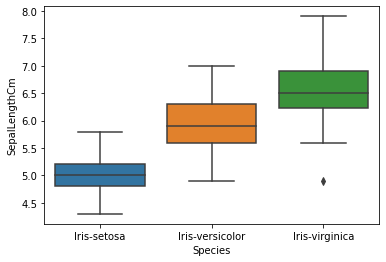

In [26]:
sns.boxplot(x='Species', y='SepalLengthCm',data=data)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

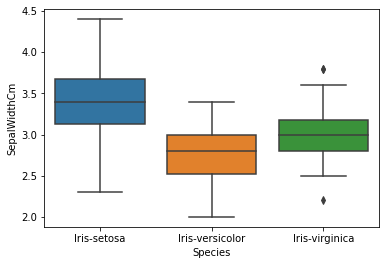

In [27]:
sns.boxplot(x='Species', y='SepalWidthCm',data=data)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

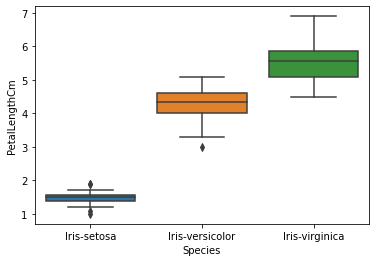

In [28]:
sns.boxplot(x='Species', y='PetalLengthCm',data=data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

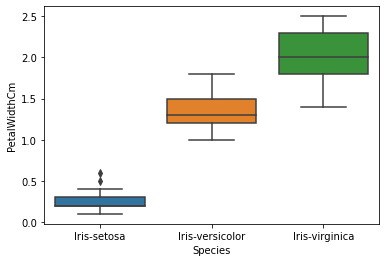

In [29]:
sns.boxplot(x='Species', y='PetalWidthCm',data=data)

Data splitting

In [30]:
X = data.iloc[:,0:4]
y = data['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.6,3.4,1.4,0.3
1,6.0,2.2,4.0,1.0
2,6.4,2.8,5.6,2.2
3,5.7,2.9,4.2,1.3
4,5.9,3.0,4.2,1.5


In [31]:
y.head()

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
3    Iris-versicolor
4    Iris-versicolor
Name: Species, dtype: object

In [32]:
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Training the model

In [33]:
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)
decision_tree = tree.DecisionTreeClassifier(random_state=777)
decision_tree = decision_tree.fit(train_features, train_targets)

Visualizing the decision tree

[Text(421.6000000000001, 597.96, 'PetalWidthCm <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [43, 38, 39]\nclass = Iris-setosa'),
 Text(316.20000000000005, 489.24, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = Iris-setosa'),
 Text(527.0000000000001, 489.24, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]\nclass = Iris-virginica'),
 Text(316.20000000000005, 380.52000000000004, 'PetalLengthCm <= 5.35\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = Iris-versicolor'),
 Text(210.80000000000004, 271.8, 'PetalLengthCm <= 4.95\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = Iris-versicolor'),
 Text(105.40000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(316.20000000000005, 163.07999999999998, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]\nclass = Iris-versicolor'),
 Text(210.80000000000004, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 

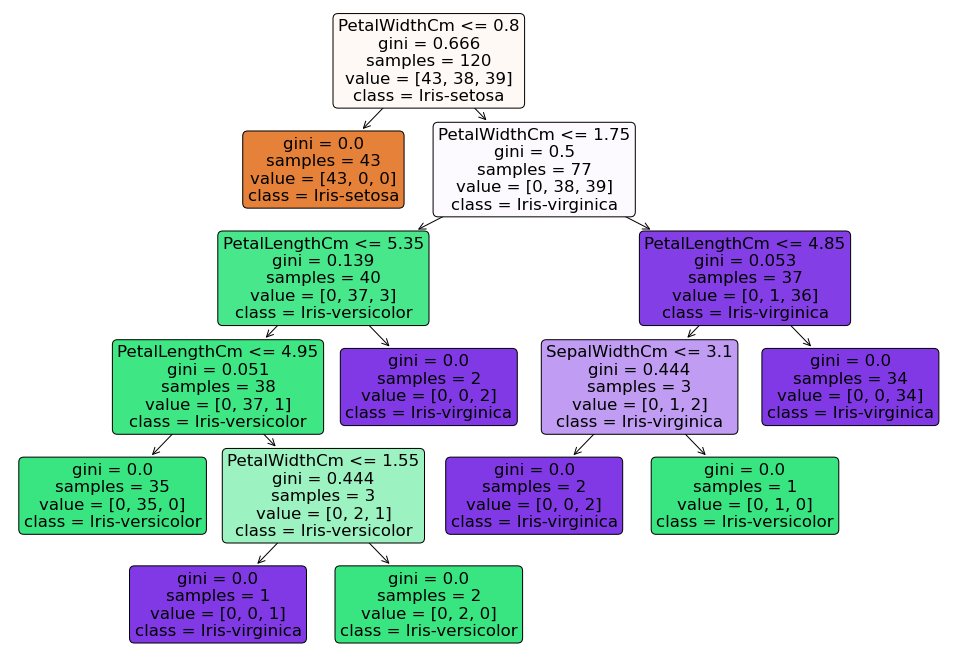

In [34]:
plt.subplots(figsize=(17, 12))
tree.plot_tree(decision_tree, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)

Features Importance

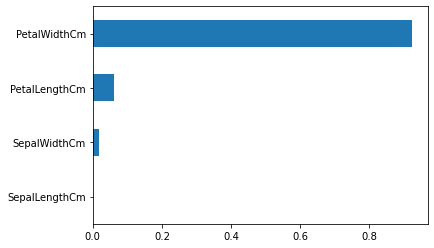

In [36]:
feat_importances = pd.Series(sorted(decision_tree.feature_importances_), index= X.columns)
feat_importances.plot(kind='barh')
plt.show()


Performance Evaluation

In [37]:
train_error = np.round(decision_tree.score(train_features, train_targets), 2)
test_error = np.round(decision_tree.score(test_features, test_targets), 2)
    
print("Training Set Mean Accuracy = " + str(train_error))
print("Test Set Mean Accuracy = " + str(test_error))

Training Set Mean Accuracy = 1.0
Test Set Mean Accuracy = 0.97


Confusion matrix

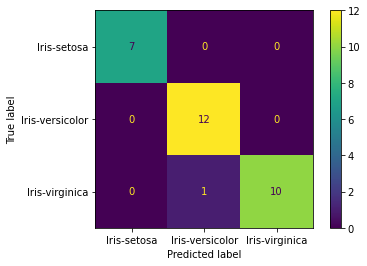

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decision_tree, test_features, test_targets)  
plt.show()

Testing

In [40]:
SepalLength = float(input("Enter Sepal Length in cm: "))
SepalWidth = float(input("Enter Sepal Width in cm: "))
PetalLength = float(input("Enter Petal Length in cm: "))
PetalWidth = float(input("Enter Petal Width in cm: "))
features = [SepalLength, SepalWidth, PetalLength, PetalWidth]

Enter Sepal Length in cm: 4
Enter Sepal Width in cm: 7
Enter Petal Length in cm: 4
Enter Petal Width in cm: 9


In [41]:
features = np.array(features)
features = features.reshape(-1, 1).T
features.shape

(1, 4)

In [42]:
pred = decision_tree.predict(features)
print("Predicted type of flower:",pred[0])

Predicted type of flower: Iris-versicolor
